https://www.kaggle.com/datasets/emmanuelfwerr/thyroid-disease-data
    

Thyroid Disease Data
Patient demographics and blood test results along Thyroid Disease diagnostic

In [1]:
# 1. Основные библиотеки
import numpy as np
import scipy.stats as stats
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import statsmodels.api as sm

# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.4.1


Курсовик
Работа выполняется по желанию. Данные с kaggle.com
Варианты тем:

1.EDA (рассчитать описательные статистики+ графический анализ с выводами)

2.Тестирование гипотезы (условия применимости того или иного критерия проверить , можно с графиками+ провести тестирование, оформить вывод)

3.Линейная регрессия (условия применимости метода проверить ,можно с графиками, построить модель, исследовать на статистическую значимость модель ,можно и коэффициенты (самостоятельное изучение), коэффициент детерминации)

4.Однофакторный или двухфакторный дисперсионный анализ (обязательно условия применимости исследовать, провести анализ, оформить вывод)

Требования к оформлению: название темы, сопроводительный текст к действиям, что и почему делаете, какой вывод.
Рекомендации по литературе : Стентон Гланц "Медико-биологическая статистика"

0. age - возраст пациента (int)
1. sex - пол, который идентифицирует пациент (str)
2. on_thyroxine - принимает ли пациент тироксин (bool)
3. запрос о тироксине - * принимает ли пациент тироксин (bool)
4. на антитиреоидных препаратах - принимает ли пациент антитиреоидные препараты (bool)
5. Болен ли пациент (bool)

6. беременная - беременна ли пациентка (bool)
7. thyroid_surgery - перенес ли пациент операцию на щитовидной железе (bool)
8. I131_treatment — проходит ли пациент лечение I131 (bool)

9. query_hypothyroid — считает ли пациент, что у него гипотиреоз (bool)
10. query_hyperthyroid - считает ли пациент, что у него гипертиреоз (bool)

11. литий - ли пациент * литий (bool)
12. goitre - есть ли у пациента зоб (bool)
13. опухоль - есть ли у пациента опухоль (bool)
14. гипофиз - есть ли у больного * гипергипофиз (поплавок)
15. psych - пациент ли * psych (bool)
16. TSH_measured - измеряли ли ТТГ в крови (bool)
17. ТТГ - уровень ТТГ в крови по данным лабораторных исследований (плавающий)


18. T3_measured — измерялся ли Т3 в крови (bool)
19. Т3 - уровень Т3 в крови при лабораторных исследованиях (плавающий)

20. TT4_measured — измеряли ли ТТ4 в крови (bool)
21. ТТ4 - уровень ТТ4 в крови при лабораторных исследованиях (плавающий)

22. T4U_measured — измеряли ли T4U в крови (bool)
23. T4U - уровень T4U в крови при лабораторных исследованиях (плавающий)

24. FTI_measured - измерялся ли FTI в крови (bool)
25. FTI - уровень FTI в крови при лабораторных работах (плавающий)

26. TBG_measured - измеряли ли TBG в крови (bool)
27. TBG - уровень TBG в крови по данным лабораторных исследований (плавающее значение)

28. referral_source - (ул.)
29. patient_id - уникальный id пациента (str)
30. target_hyper - медицинский диагноз гипертиреоза (str)
31. target_hypo - медицинский диагноз гипотиреоза (str)
32. target_bp - связывающий белок медицинской диагностики (str)
33. target_rep - тип проводимой заместительной терапии (str)

34. target_sick ​​- болен пациент или нет (str)

In [2]:
df = pd.read_csv('Thyroid_Disease_Data.csv')

In [3]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,FTI,TBG_measured,TBG,referral_source,patient_id,target_hyper,target_hypo,target_bp,target_rep,target_sick
0,41.0,F,f,f,f,f,f,f,f,f,...,109.0,f,NaN,SVHC,3733,negative,negative,negative,negative,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,other,1442,negative,negative,negative,negative,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,120.0,f,NaN,other,2965,negative,negative,negative,negative,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,NaN,f,NaN,other,806,negative,negative,negative,replacement therapy,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,70.0,f,NaN,SVI,2807,negative,negative,negative,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,M,f,f,f,f,f,f,f,f,...,148.0,f,NaN,SVI,3689,negative,negative,negative,negative,negative
2796,73.0,M,f,t,f,f,f,f,f,f,...,72.0,f,NaN,other,3652,negative,negative,negative,negative,sick
2797,75.0,M,f,f,f,f,f,f,f,f,...,183.0,f,NaN,other,1287,negative,negative,negative,negative,negative
2798,60.0,F,f,f,f,f,f,f,f,f,...,121.0,f,NaN,other,3496,negative,negative,negative,negative,negative


In [4]:
df.dtypes

age                    float64
sex                     object
on_thyroxine            object
query_on_thyroxine      object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH_measured            object
TSH                    float64
T3_measured             object
T3                     float64
TT4_measured            object
TT4                    float64
T4U_measured            object
T4U                    float64
FTI_measured            object
FTI                    float64
TBG_measured            object
TBG                    float64
referral_source         object
patient_id               int64
target_hyper            object
target_hypo             object
target_b

In [5]:
df.target_hypo.value_counts()

negative                   2580
compensated hypothyroid     154
primary hypothyroid          64
secondary hypothyroid         2
Name: target_hypo, dtype: int64

Возьмем целевую переменную-болезнь гипотериоза.Посмотрим, можно ли ее предстазывать по данным из таблицы.

In [6]:
# Посмотрим распределения признаков 

df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,2799.00000,2516.000000,2215.000000,2616.000000,2503.000000,2505.000000,0.0,2800.000000
mean,51.84423,4.672150,2.024966,109.072401,0.997912,110.787984,NaN,1895.603214
std,20.46116,21.449453,0.824600,35.392443,0.194390,32.883986,NaN,1091.130220
min,1.00000,0.005000,0.050000,2.000000,0.310000,2.000000,NaN,1.000000
25%,36.00000,0.440000,1.600000,88.000000,0.880000,93.000000,NaN,955.750000
50%,54.00000,1.400000,2.000000,104.000000,0.980000,107.000000,NaN,1913.000000
75%,67.00000,2.600000,2.400000,125.000000,1.080000,124.000000,NaN,2837.500000
max,455.00000,478.000000,10.600000,430.000000,2.120000,395.000000,NaN,3772.000000


У нас в датасете всего  35 колонок, всего 6 колонок-это количественные признаки (измеренные урони грмонов), а остальные-категориальные.

In [7]:
# Проверим типы дынных и объем памяти

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2799 non-null   float64
 1   sex                  2690 non-null   object 
 2   on_thyroxine         2800 non-null   object 
 3   query_on_thyroxine   2800 non-null   object 
 4   on_antithyroid_meds  2800 non-null   object 
 5   sick                 2800 non-null   object 
 6   pregnant             2800 non-null   object 
 7   thyroid_surgery      2800 non-null   object 
 8   I131_treatment       2800 non-null   object 
 9   query_hypothyroid    2800 non-null   object 
 10  query_hyperthyroid   2800 non-null   object 
 11  lithium              2800 non-null   object 
 12  goitre               2800 non-null   object 
 13  tumor                2800 non-null   object 
 14  hypopituitary        2800 non-null   object 
 15  psych                2800 non-null   o

 Категориальные признаки


sex, pregnant,thyroid_surgery, I131_treatment, lithium, goitre,tumor,hypopituitary,psych

In [8]:
# Удалим незаполненный столбиик TBG.

df = df.drop(columns = ['TBG'],axis = 1)

In [9]:
df = df.drop(columns=['patient_id'])

In [10]:
# Применим Dummy-кодирование для наших категориальных данных

df = pd.concat([df, pd.get_dummies(df['sex'],prefix='sex')],  axis=1)
df = pd.concat([df, pd.get_dummies(df['pregnant'], prefix='pregnant')],  axis=1)
df = pd.concat([df, pd.get_dummies(df['thyroid_surgery'], prefix='thyroid_surgery')], axis=1)
df = pd.concat([df, pd.get_dummies(df['I131_treatment'], prefix='I131_treatment')], axis=1)
df = pd.concat([df, pd.get_dummies(df['lithium'], prefix='lithium')], axis=1)
df = pd.concat([df, pd.get_dummies(df['goitre'], prefix='goitre')], axis=1)
df = pd.concat([df, pd.get_dummies(df['tumor'], prefix='tumor')], axis=1)
df = pd.concat([df, pd.get_dummies(df['hypopituitary'], prefix='hypopituitary')], axis=1)
df = pd.concat([df, pd.get_dummies(df['psych'], prefix='psych')], axis=1)
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium_f,lithium_t,goitre_f,goitre_t,tumor_f,tumor_t,hypopituitary_f,hypopituitary_t,psych_f,psych_t
0,41.0,F,f,f,f,f,f,f,f,f,...,1,0,1,0,1,0,1,0,1,0
1,23.0,F,f,f,f,f,f,f,f,f,...,1,0,1,0,1,0,1,0,1,0
2,46.0,M,f,f,f,f,f,f,f,f,...,1,0,1,0,1,0,1,0,1,0
3,70.0,F,t,f,f,f,f,f,f,f,...,1,0,1,0,1,0,1,0,1,0
4,70.0,F,f,f,f,f,f,f,f,f,...,1,0,1,0,1,0,1,0,1,0


In [11]:
df['target']=1

In [12]:
# Переведем нашу целеую перменную  категории болен/не болен.

df.loc[df['target_hypo']=='negative',['target']]=0

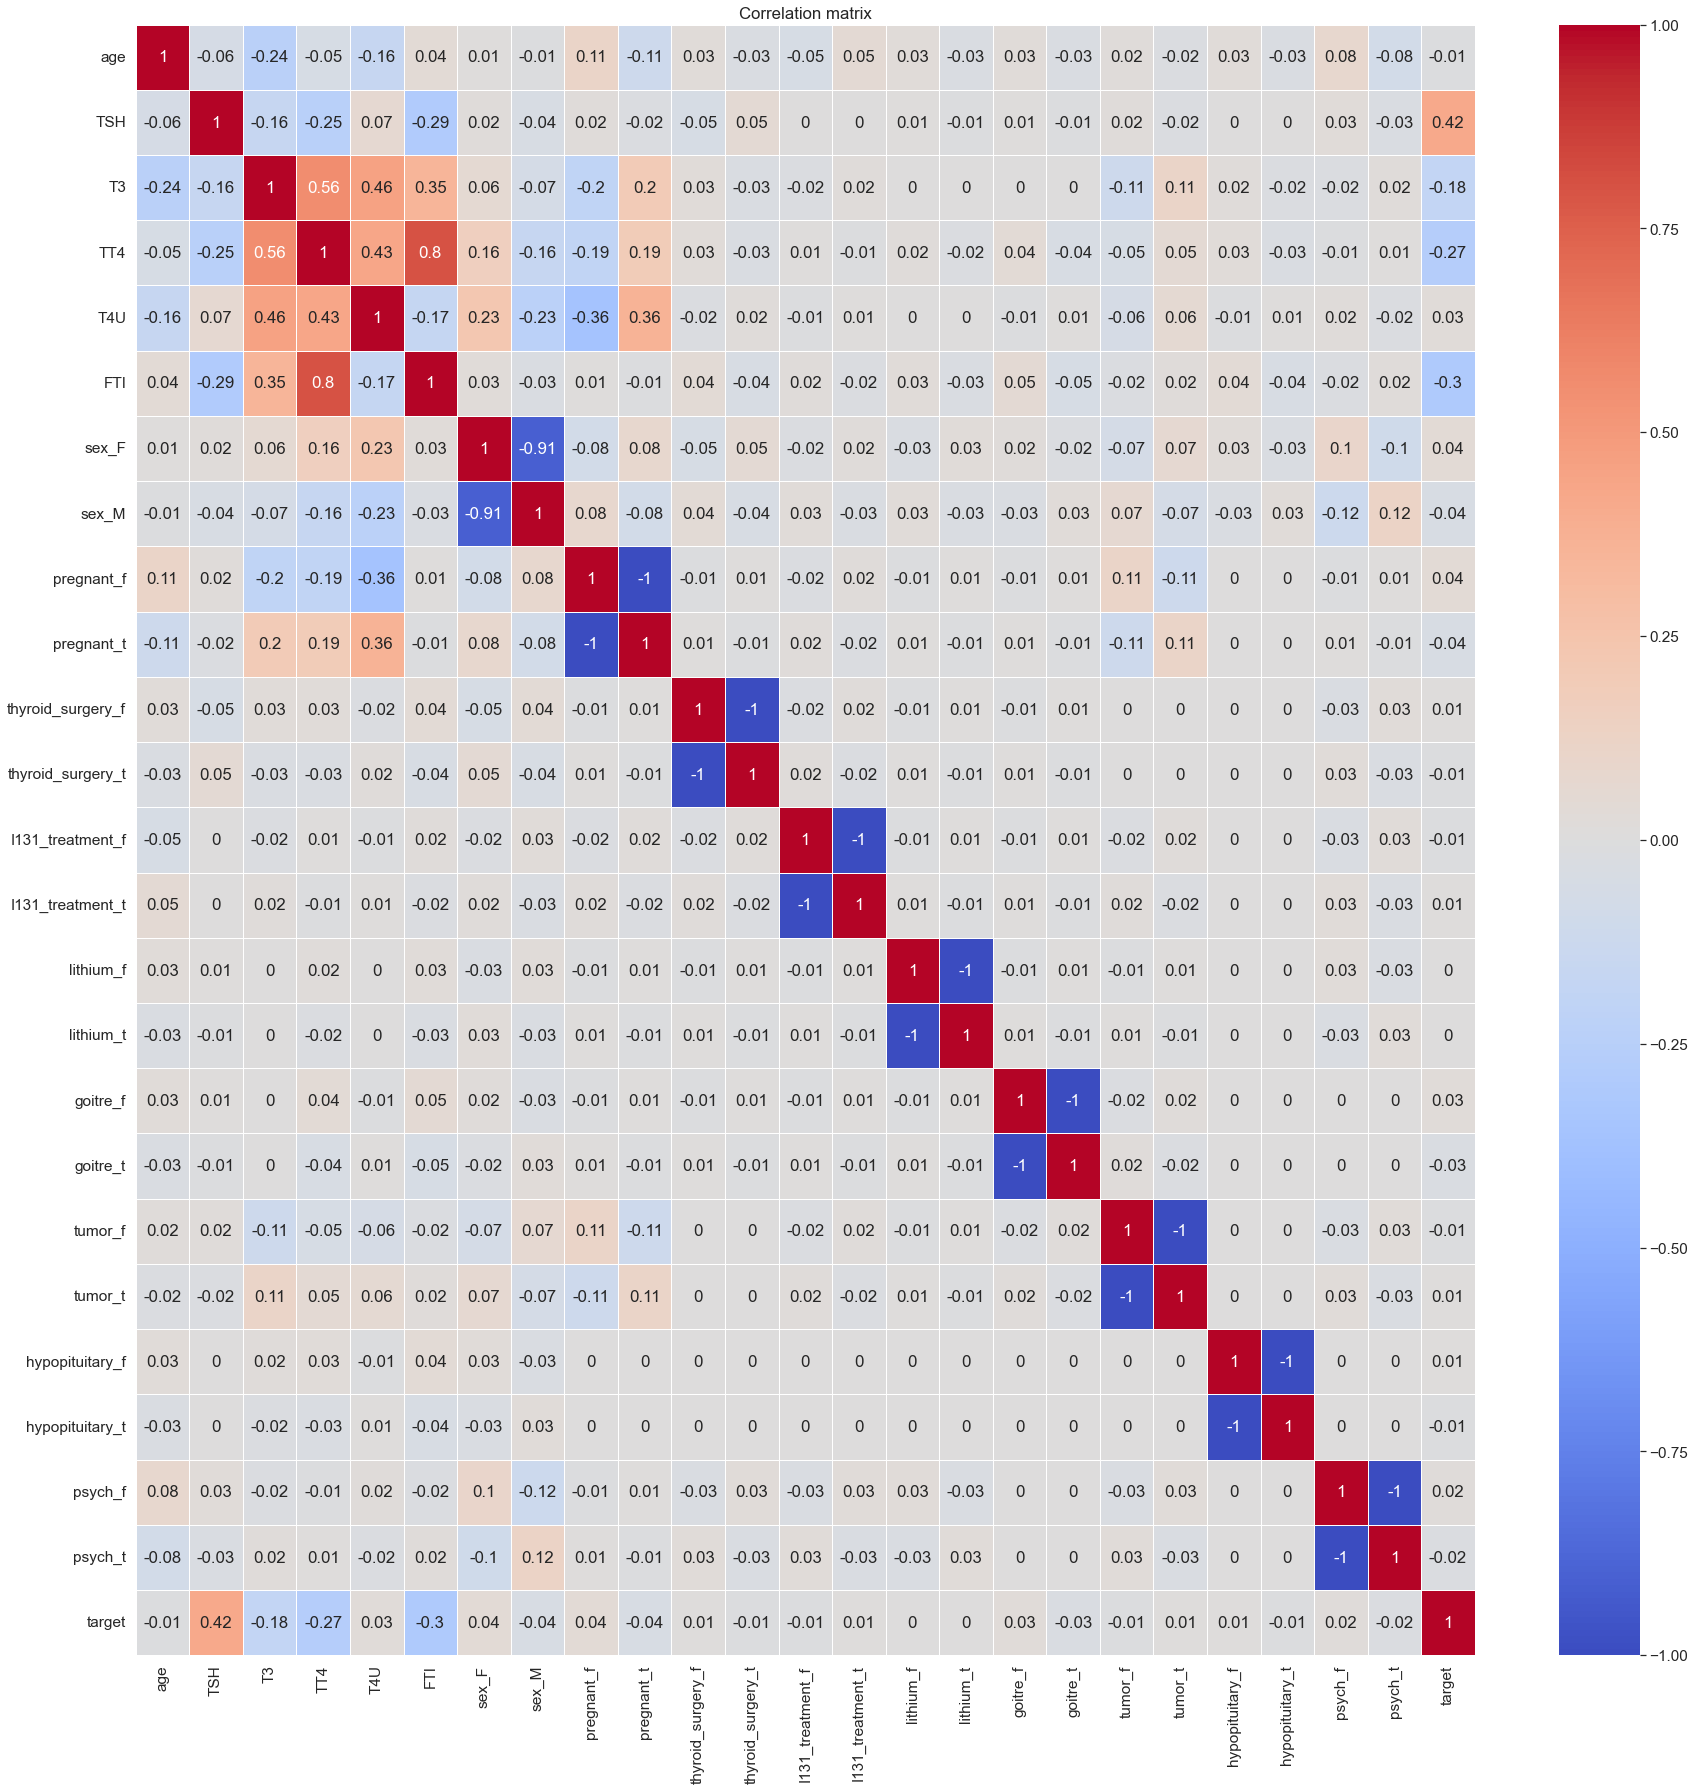

In [134]:
plt.figure(figsize = (30,30))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.005] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Заметим по матрице корреляции высокую связь уровня T3 и TT4/Будем держать это в голове ,если понадобиться,
то исключим из модели одну из переменных.

In [13]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,pregnant_f,pregnant_t,...,lithium_t,goitre_f,goitre_t,tumor_f,tumor_t,hypopituitary_f,hypopituitary_t,psych_f,psych_t,target
count,2799.00000,2516.000000,2215.000000,2616.000000,2503.000000,2505.000000,2800.000000,2800.000000,2800.000000,2800.000000,...,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,51.84423,4.672150,2.024966,109.072401,0.997912,110.787984,0.653571,0.307143,0.985357,0.014643,...,0.005000,0.991071,0.008929,0.974643,0.025357,0.999643,0.000357,0.951786,0.048214,0.078571
std,20.46116,21.449453,0.824600,35.392443,0.194390,32.883986,0.475917,0.461392,0.120140,0.120140,...,0.070546,0.094085,0.094085,0.157235,0.157235,0.018898,0.018898,0.214257,0.214257,0.269117
min,1.00000,0.005000,0.050000,2.000000,0.310000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.00000,0.440000,1.600000,88.000000,0.880000,93.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,54.00000,1.400000,2.000000,104.000000,0.980000,107.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,67.00000,2.600000,2.400000,125.000000,1.080000,124.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,455.00000,478.000000,10.600000,430.000000,2.120000,395.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Видим в данных очень большой разброс значений TSН, TT4, FTI очень большое максимальое значение в колонке age.

<AxesSubplot:>

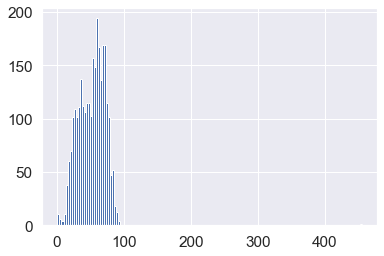

In [136]:
df.age.hist(bins=150)

In [14]:
#заменим выброс в возрасте средним значением

df.loc[df['age']>110,['age']] = df['age'].mean()

Средний возраст исследуемой группы 51 год. 95% значений возраста лежат от 11 до 92 лет.

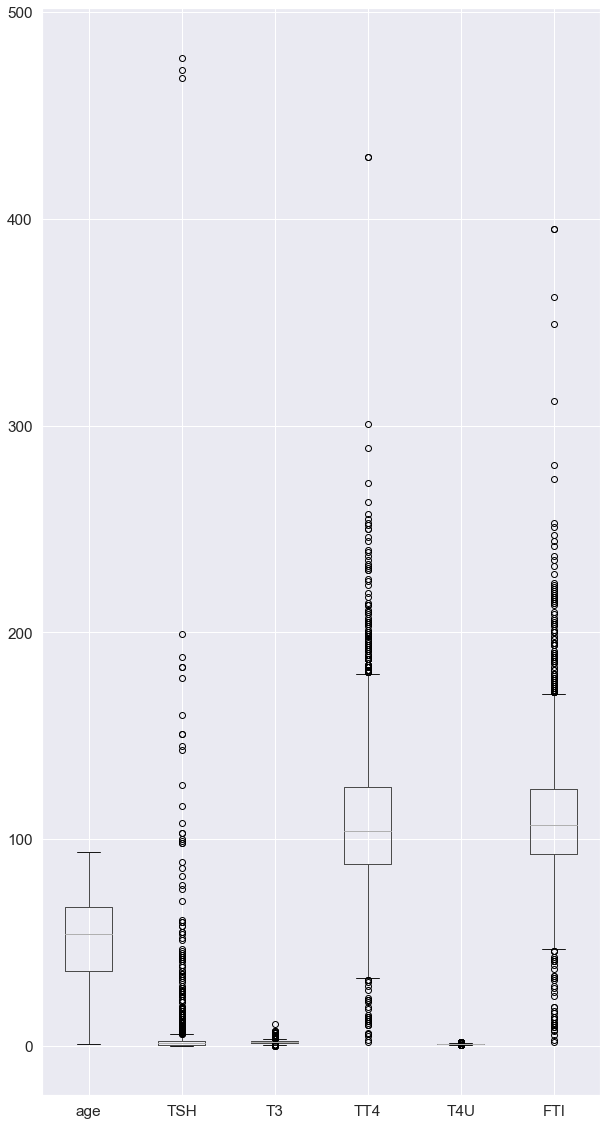

In [18]:
plt.figure(figsize=(10, 20))

boxplot = df.boxplot(column=['age','TSH','T3','TT4','T4U','FTI']) 

Посмотрим на разброс целевой переменной и прикнаков. Увидем ли мы визуально связь.

In [15]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'referral_source',
       'target_hyper', 'target_hypo', 'target_bp', 'target_rep', 'target_sick',
       'sex_F', 'sex_M', 'pregnant_f', 'pregnant_t', 'thyroid_surgery_f',
       'thyroid_surgery_t', 'I131_treatment_f', 'I131_treatment_t',
       'lithium_f', 'lithium_t', 'goitre_f', 'goitre_t', 'tumor_f', 'tumor_t',
       'hypopituitary_f', 'hypopituitary_t', 'psych_f', 'psych_t', 'target'],
      dtype='object')

In [16]:
df['target'].value_counts()

0    2580
1     220
Name: target, dtype: int64

In [17]:
df_for_plot = df.iloc[:,:32]

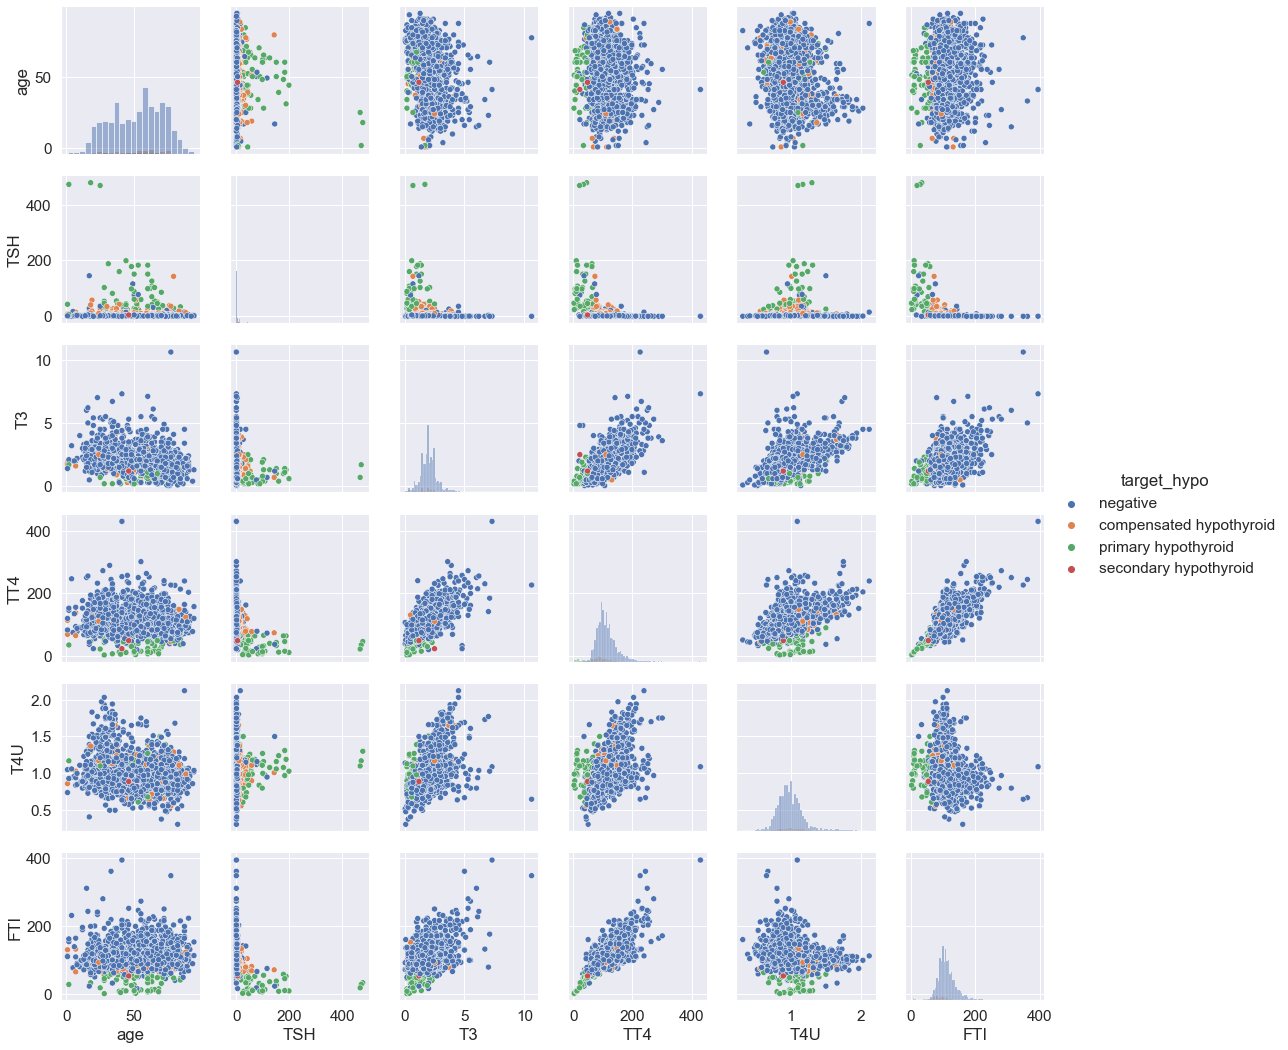

In [21]:
g = sns.PairGrid(df_for_plot, hue="target_hypo")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

Для таких признаков как TSH, FTI,TT4 явно визаульно видна зависимость целевой переменной от значения этих признаков.


Проверим, можно ли построить линейную регрессию для прогноза заполевания гипотериозом по имеющимся данным.
Делать прогноз будем с помощью простейшей нейронной сети  помощью слоя dense в один нейрон, которой представляет собой линейную регрессию.

In [18]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'referral_source',
       'target_hyper', 'target_hypo', 'target_bp', 'target_rep', 'target_sick',
       'sex_F', 'sex_M', 'pregnant_f', 'pregnant_t', 'thyroid_surgery_f',
       'thyroid_surgery_t', 'I131_treatment_f', 'I131_treatment_t',
       'lithium_f', 'lithium_t', 'goitre_f', 'goitre_t', 'tumor_f', 'tumor_t',
       'hypopituitary_f', 'hypopituitary_t', 'psych_f', 'psych_t', 'target'],
      dtype='object')

In [36]:
features = ['sex_F', 'sex_M', 'pregnant_f', 'pregnant_t',
       'thyroid_surgery_f', 'thyroid_surgery_t', 'I131_treatment_f',
       'I131_treatment_t', 'lithium_f', 'lithium_t', 'goitre_f', 'goitre_t',
       'tumor_f', 'tumor_t', 'hypopituitary_f', 'hypopituitary_t', 'psych_f',
       'psych_t', 'TSH','T3',  'TT4', 'T4U','FTI' ]

In [143]:
df = df[['TSH', 'T3',  'TT4',  'T4U', 'FTI',
       'sex_F', 'sex_M', 'pregnant_f', 'pregnant_t', 'thyroid_surgery_f',
       'thyroid_surgery_t', 'I131_treatment_f', 'I131_treatment_t',
       'lithium_f', 'lithium_t', 'goitre_f', 'goitre_t', 'tumor_f', 'tumor_t',
       'hypopituitary_f', 'hypopituitary_t', 'psych_f', 'psych_t', 'target']]

In [19]:
features1 = ['age', 'sex', 'pregnant', 'thyroid_surgery','I131_treatment', 'lithium',
       'goitre', 'tumor',  'psych',  'TSH','T3',  'TT4',  'T4U','FTI', ]

In [20]:
# У нас есть пропущенные данные в таблице признаков.

df.isna().sum()

age                      1
sex                    110
on_thyroxine             0
query_on_thyroxine       0
on_antithyroid_meds      0
sick                     0
pregnant                 0
thyroid_surgery          0
I131_treatment           0
query_hypothyroid        0
query_hyperthyroid       0
lithium                  0
goitre                   0
tumor                    0
hypopituitary            0
psych                    0
TSH_measured             0
TSH                    284
T3_measured              0
T3                     585
TT4_measured             0
TT4                    184
T4U_measured             0
T4U                    297
FTI_measured             0
FTI                    295
TBG_measured             0
referral_source          0
target_hyper             0
target_hypo              0
target_bp                0
target_rep               0
target_sick              0
sex_F                    0
sex_M                    0
pregnant_f               0
pregnant_t               0
t

Заменим пропуски средними значениями по столбцам.

In [21]:
df = df.fillna(df.mean())

<ipython-input-21-04e87d67d337>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


Разделим данные на выборку для обучения и теста. 

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(df[features], \
                                                      df['target'], test_size=0.33, shuffle=True, random_state=21)

In [ ]:
# Попробуем понять, какой показатель в крови имеет решающее занчение для постановки диагноза гипотериоз. 

In [38]:
X_train

,sex_F,sex_M,pregnant_f,pregnant_t,thyroid_surgery_f,thyroid_surgery_t,I131_treatment_f,I131_treatment_t,lithium_f,lithium_t,...,tumor_t,hypopituitary_f,hypopituitary_t,psych_f,psych_t,TSH,T3,TT4,T4U,FTI
212,1,0,1,0,1,0,1,0,1,0,...,0,1,0,0,1,1.900,2.300000,135.000000,1.070000,126.000000
1008,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,2.800,1.900000,108.000000,0.930000,116.000000
169,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,2.100,2.024966,109.072401,0.997912,110.787984
188,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,6.100,2.200000,74.000000,0.997912,110.787984
1112,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,0.005,2.024966,143.000000,0.760000,189.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,10.300,2.000000,68.000000,1.150000,59.000000
48,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,0.150,1.700000,162.000000,0.870000,186.000000
772,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,0.010,1.500000,160.000000,0.870000,185.000000
1848,0,1,1,0,1,0,1,0,1,0,...,0,1,0,1,0,0.300,1.800000,114.000000,1.000000,114.000000


In [39]:
X_train.columns

Index(['sex_F', 'sex_M', 'pregnant_f', 'pregnant_t', 'thyroid_surgery_f',
       'thyroid_surgery_t', 'I131_treatment_f', 'I131_treatment_t',
       'lithium_f', 'lithium_t', 'goitre_f', 'goitre_t', 'tumor_f', 'tumor_t',
       'hypopituitary_f', 'hypopituitary_t', 'psych_f', 'psych_t', 'TSH', 'T3',
       'TT4', 'T4U', 'FTI'],
      dtype='object')

In [40]:
X_train.isna().sum()


sex_F                0
sex_M                0
pregnant_f           0
pregnant_t           0
thyroid_surgery_f    0
thyroid_surgery_t    0
I131_treatment_f     0
I131_treatment_t     0
lithium_f            0
lithium_t            0
goitre_f             0
goitre_t             0
tumor_f              0
tumor_t              0
hypopituitary_f      0
hypopituitary_t      0
psych_f              0
psych_t              0
TSH                  0
T3                   0
TT4                  0
T4U                  0
FTI                  0
dtype: int64

In [41]:
len(X_train)

1876

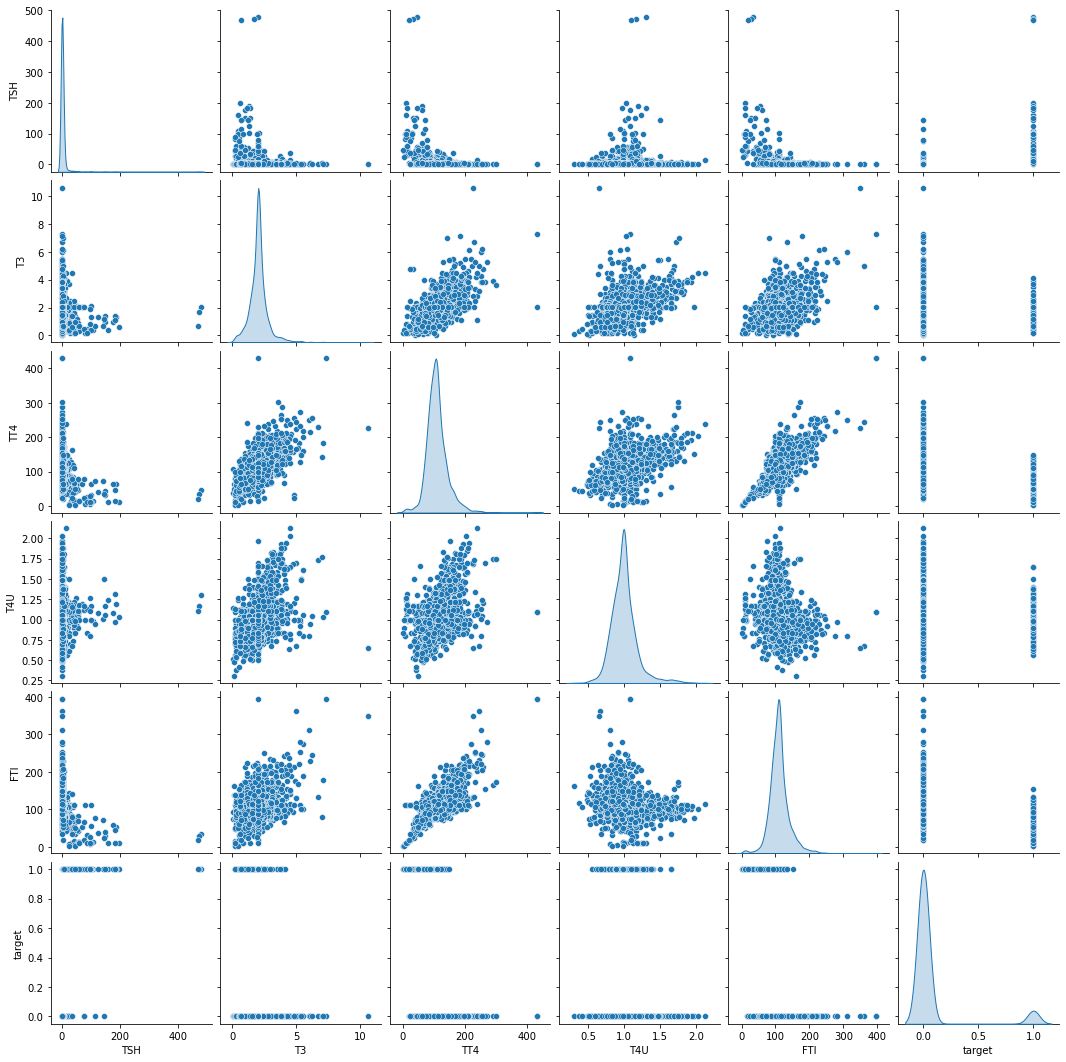

In [42]:
sns.pairplot(df[['TSH', 'T3',
       'TT4', 'T4U', 'FTI','target']], diag_kind='kde')

In [43]:
#Вот наша необученная нейросеть

hypo_model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(23,)),
    layers.Dense(units=1)
])

hypo_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 24        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [44]:
#Зададим оптимизатор, шаг обучения  и ускорение для быстрейшего обучения

hypo_model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005,momentum=0.9),
    loss='mean_absolute_error')

In [45]:
y_valid = pd.DataFrame(y_valid)

In [46]:
y_valid

,target
684,0
2068,0
1504,0
99,0
391,0
...,...
2449,0
1924,0
2509,0
1598,0


In [47]:
X_train

,sex_F,sex_M,pregnant_f,pregnant_t,thyroid_surgery_f,thyroid_surgery_t,I131_treatment_f,I131_treatment_t,lithium_f,lithium_t,...,tumor_t,hypopituitary_f,hypopituitary_t,psych_f,psych_t,TSH,T3,TT4,T4U,FTI
212,1,0,1,0,1,0,1,0,1,0,...,0,1,0,0,1,1.900,2.300000,135.000000,1.070000,126.000000
1008,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,2.800,1.900000,108.000000,0.930000,116.000000
169,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,2.100,2.024966,109.072401,0.997912,110.787984
188,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,6.100,2.200000,74.000000,0.997912,110.787984
1112,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,0.005,2.024966,143.000000,0.760000,189.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,10.300,2.000000,68.000000,1.150000,59.000000
48,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,0.150,1.700000,162.000000,0.870000,186.000000
772,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,0.010,1.500000,160.000000,0.870000,185.000000
1848,0,1,1,0,1,0,1,0,1,0,...,0,1,0,1,0,0.300,1.800000,114.000000,1.000000,114.000000


In [48]:
# Обучим модель на данных
tf.random.set_seed(42)

#%%time
history = hypo_model.fit(
    X_train,
    y_train,
    epochs=300,
    # Suppress logging.
    verbose=1)

Epoch 1/300
59/59 [==============================] - 1s 1ms/step - loss: 18.3030
Epoch 2/300
59/59 [==============================] - 0s 2ms/step - loss: 12.2361
Epoch 3/300
59/59 [==============================] - 0s 1ms/step - loss: 7.0675A: 0s - loss: 7.267
Epoch 4/300
59/59 [==============================] - 0s 1ms/step - loss: 4.9508
Epoch 5/300
59/59 [==============================] - 0s 1ms/step - loss: 4.7075
Epoch 6/300
59/59 [==============================] - 0s 1ms/step - loss: 4.7008
Epoch 7/300
59/59 [==============================] - 0s 1ms/step - loss: 4.4878
Epoch 8/300
59/59 [==============================] - 0s 1ms/step - loss: 4.3317
Epoch 9/300
59/59 [==============================] - 0s 1ms/step - loss: 4.1363
Epoch 10/300
59/59 [==============================] - 0s 1ms/step - loss: 3.7321
Epoch 11/300
59/59 [==============================] - 0s 2ms/step - loss: 3.8547
Epoch 12/300
59/59 [==============================] - 0s 2ms/step - loss: 3.4611
Epoch 13/300
59/

59/59 [==============================] - 0s 2ms/step - loss: 0.0825
Epoch 102/300
59/59 [==============================] - 0s 1ms/step - loss: 0.0886
Epoch 103/300
59/59 [==============================] - 0s 1ms/step - loss: 0.0834
Epoch 104/300
59/59 [==============================] - 0s 1ms/step - loss: 0.0835
Epoch 105/300
59/59 [==============================] - 0s 1ms/step - loss: 0.0860
Epoch 106/300
59/59 [==============================] - 0s 1ms/step - loss: 0.0864
Epoch 107/300
59/59 [==============================] - 0s 1ms/step - loss: 0.0921
Epoch 108/300
59/59 [==============================] - 0s 1ms/step - loss: 0.0779
Epoch 109/300
59/59 [==============================] - 0s 1ms/step - loss: 0.0827
Epoch 110/300
59/59 [==============================] - 0s 1ms/step - loss: 0.0769
Epoch 111/300
59/59 [==============================] - 0s 1ms/step - loss: 0.0905
Epoch 112/300
59/59 [==============================] - 0s 1ms/step - loss: 0.0876
Epoch 113/300
59/59 [=========

59/59 [==============================] - 0s 2ms/step - loss: 0.0825
Epoch 202/300
59/59 [==============================] - 0s 2ms/step - loss: 0.0774
Epoch 203/300
59/59 [==============================] - 0s 2ms/step - loss: 0.0801
Epoch 204/300
59/59 [==============================] - 0s 2ms/step - loss: 0.0796
Epoch 205/300
59/59 [==============================] - 0s 2ms/step - loss: 0.0947
Epoch 206/300
59/59 [==============================] - 0s 2ms/step - loss: 0.0921
Epoch 207/300
59/59 [==============================] - 0s 3ms/step - loss: 0.0839
Epoch 208/300
59/59 [==============================] - 0s 2ms/step - loss: 0.0840
Epoch 209/300
59/59 [==============================] - 0s 2ms/step - loss: 0.0753
Epoch 210/300
59/59 [==============================] - 0s 2ms/step - loss: 0.0857
Epoch 211/300
59/59 [==============================] - 0s 2ms/step - loss: 0.0845
Epoch 212/300
59/59 [==============================] - 0s 2ms/step - loss: 0.0776
Epoch 213/300
59/59 [=========

59/59 [==============================] - 0s 2ms/step - loss: 0.0796


In [49]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,epoch
295,0.081490,295
296,0.083795,296
297,0.082828,297
298,0.085908,298
299,0.086915,299


In [50]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error ')
  plt.legend()
  plt.grid(True)

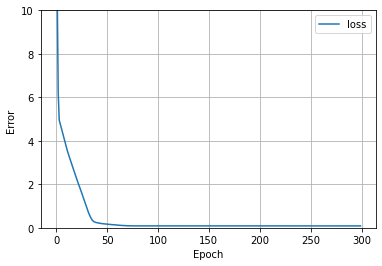

In [51]:
plot_loss(history)

In [52]:
#Это наши веса для признаков в модели

print ('веса для признаков в модели', hypo_model.get_weights()[0]) 

# Это наш bias или inerceprion в линейной регрессии

print ('bias или interceprion в линейной регрессии',hypo_model.get_weights()[1])

веса для признаков в модели [[ 0.00114186]
 [-0.00106304]
 [ 0.03307217]
 [ 0.03943153]
 [-0.25636572]
 [-0.26269174]
 [ 0.40959537]
 [ 0.40682438]
 [-0.11100812]
 [-0.11207002]
 [ 0.0025989 ]
 [ 0.0021174 ]
 [-0.17176844]
 [-0.16632807]
 [ 0.24467221]
 [ 0.39968348]
 [-0.2576033 ]
 [-0.25617546]
 [ 0.00603467]
 [ 0.00144094]
 [ 0.00058559]
 [-0.07263025]
 [-0.00044732]]
bias или interceprion в линейной регрессии [0.17006351]


По весам видно ,что набольшее влияние на постановку диагноза дает изменение 6,7,5,4,12,13,14,15,16,17 параметров.

In [74]:
X_train.columns[[6,7,5,4,12,13,14,15,16,17]]

Index(['I131_treatment_f', 'I131_treatment_t', 'thyroid_surgery_t',
       'thyroid_surgery_f', 'tumor_f', 'tumor_t', 'hypopituitary_f',
       'hypopituitary_t', 'psych_f', 'psych_t'],
      dtype='object')

In [75]:
X_train.iloc[:,[6,7,5,4,12,13,14,15,16,17]]

,I131_treatment_f,I131_treatment_t,thyroid_surgery_t,thyroid_surgery_f,tumor_f,tumor_t,hypopituitary_f,hypopituitary_t,psych_f,psych_t
212,1,0,0,1,1,0,1,0,0,1
1008,1,0,0,1,1,0,1,0,1,0
169,1,0,0,1,1,0,1,0,1,0
188,1,0,0,1,1,0,1,0,1,0
1112,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
2416,1,0,0,1,1,0,1,0,1,0
48,1,0,0,1,1,0,1,0,1,0
772,1,0,0,1,1,0,1,0,1,0
1848,1,0,0,1,1,0,1,0,1,0


In [55]:
hypo_model.evaluate(X_valid.iloc[:,-24:], y_valid)

29/29 [==============================] - 0s 1ms/step - loss: 0.0820


0.08202923834323883

После оценки работы модели мы получаем ошибку в 8%.



In [63]:
#Попробуем поставить диаггноз гипотериоза только по колличесвенным признакам.



hypo_model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(5,)),
    layers.Dense(units=1)
])

hypo_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [64]:
#Зададим оптимизатор, шаг обучения  и ускорение для быстрейшего обучения

hypo_model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005,momentum=0.9),
    loss='mean_absolute_error',
    metrics=['accuracy'])

In [65]:
# Обучим модель на данных
tf.random.set_seed(42)

#%%time
history = hypo_model.fit(
    X_train.iloc[:,-5:],
    y_train,
    epochs=200,
    # Suppress logging.
    verbose=1)

Epoch 1/200
59/59 [==============================] - 1s 1ms/step - loss: 133.2679 - accuracy: 0.9354
Epoch 2/200
59/59 [==============================] - 0s 1ms/step - loss: 126.5093 - accuracy: 0.9304
Epoch 3/200
59/59 [==============================] - 0s 2ms/step - loss: 119.8536 - accuracy: 0.9346
Epoch 4/200
59/59 [==============================] - 0s 2ms/step - loss: 113.1664 - accuracy: 0.9283
Epoch 5/200
59/59 [==============================] - 0s 1ms/step - loss: 105.3385 - accuracy: 0.9256
Epoch 6/200
59/59 [==============================] - 0s 2ms/step - loss: 100.6068 - accuracy: 0.9180
Epoch 7/200
59/59 [==============================] - 0s 1ms/step - loss: 93.4872 - accuracy: 0.9232
Epoch 8/200
59/59 [==============================] - 0s 1ms/step - loss: 86.0891 - accuracy: 0.9308
Epoch 9/200
59/59 [==============================] - 0s 2ms/step - loss: 80.4783 - accuracy: 0.9339
Epoch 10/200
59/59 [==============================] - 0s 1ms/step - loss: 73.4753 - accuracy: 

59/59 [==============================] - 0s 1ms/step - loss: 0.0926 - accuracy: 0.9236
Epoch 82/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.9226
Epoch 83/200
59/59 [==============================] - 0s 2ms/step - loss: 0.1053 - accuracy: 0.9139
Epoch 84/200
59/59 [==============================] - 0s 1ms/step - loss: 0.0787 - accuracy: 0.9351
Epoch 85/200
59/59 [==============================] - 0s 1ms/step - loss: 0.0890 - accuracy: 0.9249
Epoch 86/200
59/59 [==============================] - 0s 1ms/step - loss: 0.0954 - accuracy: 0.9178
Epoch 87/200
59/59 [==============================] - 0s 1ms/step - loss: 0.0851 - accuracy: 0.9318
Epoch 88/200
59/59 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 0.9292
Epoch 89/200
59/59 [==============================] - 0s 1ms/step - loss: 0.1011 - accuracy: 0.9103
Epoch 90/200
59/59 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9278
Epoch 91/200


59/59 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9328
Epoch 161/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0765 - accuracy: 0.9337
Epoch 162/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.9217
Epoch 163/200
59/59 [==============================] - 0s 3ms/step - loss: 0.0837 - accuracy: 0.9268
Epoch 164/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0905 - accuracy: 0.9190
Epoch 165/200
59/59 [==============================] - 0s 3ms/step - loss: 0.0916 - accuracy: 0.9206
Epoch 166/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0968 - accuracy: 0.9136
Epoch 167/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0859 - accuracy: 0.9250
Epoch 168/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0870 - accuracy: 0.9237
Epoch 169/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0783 - accuracy: 0.9321
Epoc

In [66]:
hypo_model.evaluate(X_valid.iloc[:,-5:], y_valid)

29/29 [==============================] - 0s 1ms/step - loss: 0.0809 - accuracy: 0.9329


[0.0809466764330864, 0.9329004287719727]

In [ ]:
Если брать толко числовые данные анализов, то точность диагноза такая же.

Точность диагностики составляет 93%.
Ошибка равна 8%.

In [80]:
#Это наши веса для признаков в модели

print ('веса для признаков в модели', hypo_model.get_weights()[0]) 

# Это наш bias или inerceprion в линейной регрессии

print ('bias или interceprion в линейной регрессии',hypo_model.get_weights()[1])

веса для признаков в модели [[ 0.0058621 ]
 [ 0.00084753]
 [ 0.0015951 ]
 [-0.20715936]
 [-0.00172919]]
bias или interceprion в линейной регрессии [0.19788635]


In [81]:
X_train.columns[[-2]]

Index(['T4U'], dtype='object')

In [ ]:
При постановке диагноза по количественным показателям для машины важнее всего показатель T4 в крови.

In [ ]:
Попробумем построить прогнозную модель через OLS модуля stats пакета scipy.
Возьмем только количественные данные.

In [124]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'referral_source',
       'target_hyper', 'target_hypo', 'target_bp', 'target_rep', 'target_sick',
       'sex_F', 'sex_M', 'pregnant_f', 'pregnant_t', 'thyroid_surgery_f',
       'thyroid_surgery_t', 'I131_treatment_f', 'I131_treatment_t',
       'lithium_f', 'lithium_t', 'goitre_f', 'goitre_t', 'tumor_f', 'tumor_t',
       'hypopituitary_f', 'hypopituitary_t', 'psych_f', 'psych_t', 'target'],
      dtype='object')

In [166]:
from statsmodels.formula.api import ols
lm = ols(data=df,formula='target ~ age+TSH+T3+TT4+T4U+FTI').fit()
print(lm.summary(alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     129.7
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          3.84e-145
Time:                        14:29:03   Log-Likelihood:                 46.920
No. Observations:                2800   AIC:                            -79.84
Df Residuals:                    2793   BIC:                            -38.28
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0219      0.066      0.334      0.7

In [167]:
lm.params

Intercept    0.021891
age          0.000031
TSH          0.004673
T3          -0.025879
TT4         -0.002193
T4U          0.249758
FTI          0.000682
dtype: float64

Мы видим , что с аналогичной задачей пакет stats српавился менее успешно.
Показатель R2 говорит ,что 22 процент разброса целевой переменной можно объяснить изменением возраста 
и измеряемых гормонов.
Для модели более важны показатели TSH, TT4, T4U.



<AxesSubplot:>

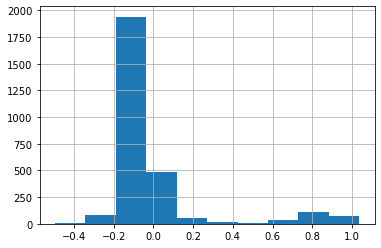

In [205]:
lm.resid.hist()

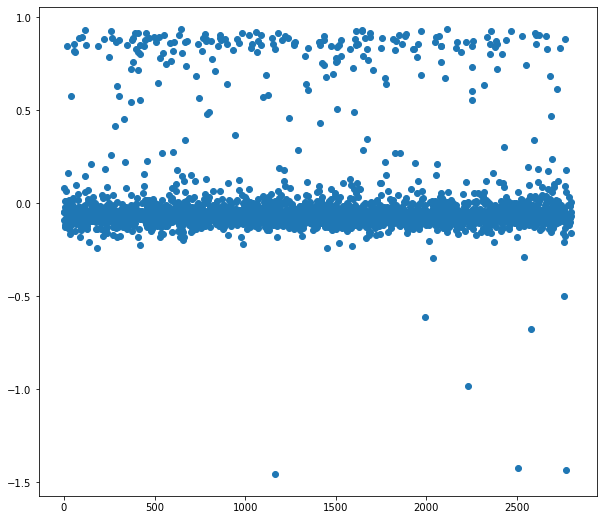

In [172]:
from matplotlib.pyplot import figure
figure(figsize=(10, 9))
plt.scatter(lm.resid.index,lm.resid)
plt.show()

Рассмотрев наши остатки мы можем сказать ,что не выполняются предположения для применения линейной регрессии:
 Остатки ненормально распределены
 Остатки не имеют одну и ту же вариабельность.

In [ ]:
Модель ols оказалаcь менее результативна.